In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

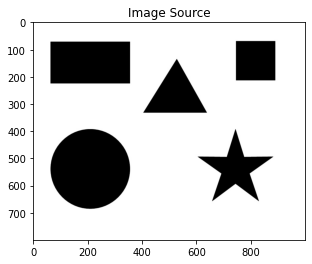

In [2]:
# Let's load a simple image with 3 black squares
image = cv2.imread('../images/someshapes.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image Source')
plt.show()

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

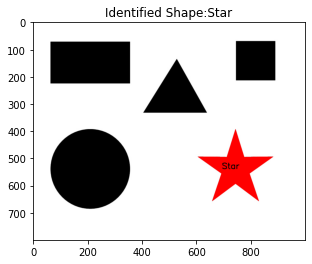

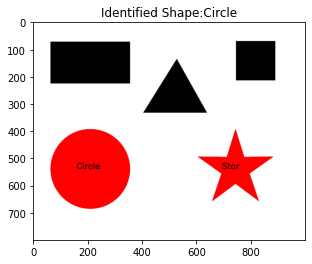

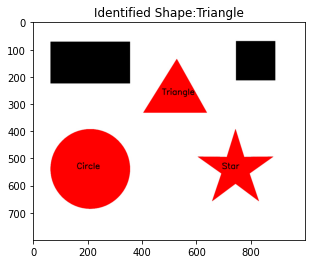

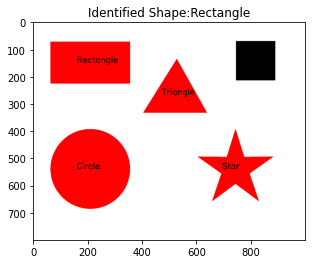

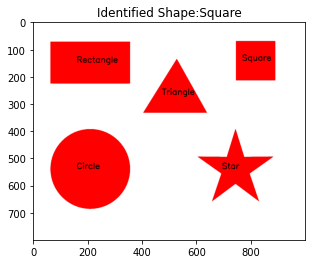

In [4]:
original_image = image.copy()

for cnt in contours:
    
    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True), True)
    
    M = cv2.moments(cnt)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    if len(approx) == 3:
        shape_name = "Triangle"
        
    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        
        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and 
        if abs(w-h) <= 3:
            shape_name = "Square"
        else:
            shape_name = "Rectangle"

    elif len(approx) == 10:
        shape_name = "Star"

    elif len(approx) >= 15:
        shape_name = "Circle"
    
    else:
        shape_name = 'could not identified'
    
        

    cv2.drawContours(original_image, [cnt], 0, (0, 0, 255), -1)
    cv2.putText(original_image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Identified Shape: '+str(shape_name)); plt.show()